In [1]:
# Importando as bibliotecas necessárias
!pip install control
import control as ct
import numpy as np
import matplotlib.pyplot as plt

# Configurações para os gráficos
plt.style.use('seaborn-v0_8-whitegrid')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 12.6 MB/s eta 0:00:00


Vamos usar a simulação para validar o Critério de Routh-Hurwitz. O objetivo é conectar a análise matemática com o comportamento real de um sistema dinâmico.

1.  **Análise de Estabilidade via Resposta ao Degrau:** Usaremos o critério de Routh-Hurwitz para determinar a faixa de um ganho `K` que garante a estabilidade de um sistema de 3ª ordem. Em seguida, simularemos a resposta ao degrau para valores de `K` **dentro**, **no limite** e **fora** dessa faixa para observar os comportamentos estável, marginalmente estável e instável.
2.  **Verificação via Lugar das Raízes:** Plotaremos o caminho que os polos do sistema percorrem no plano-s conforme o ganho `K` varia. Isso nos permitirá confirmar visualmente o resultado da análise de Routh, mostrando o exato momento em que os polos cruzam para o semiplano direito.

--- Simulação 1: Verificando a Estabilidade com a Resposta ao Degrau ---


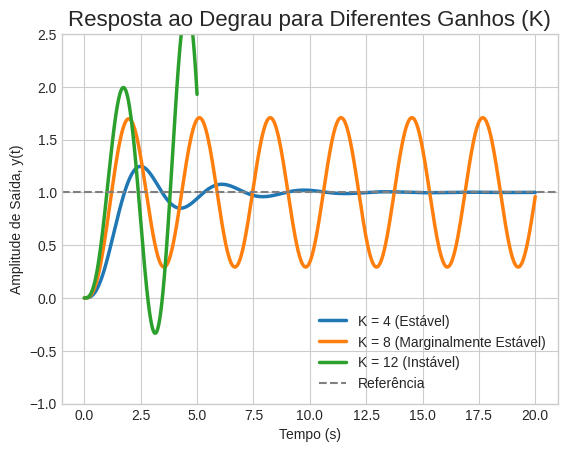


ANÁLISE:
- Com K=4, a resposta converge para o valor final. O sistema é ESTÁVEL.
- Com K=8, a resposta oscila com amplitude constante. O sistema é MARGINALMENTE ESTÁVEL.
- Com K=12, a resposta diverge exponencialmente. O sistema é INSTÁVEL.

Os resultados da simulação confirmam perfeitamente a faixa de estabilidade (0 < K < 8) prevista pelo critério de Routh-Hurwitz.


In [2]:
print("--- Simulação 1: Verificando a Estabilidade com a Resposta ao Degrau ---")

# Considere o sistema da Figura 6.18, cuja equação característica é:
# q(s) = s³ + 2s² + 4s + K = 0

# Pelo critério de Routh-Hurwitz, a análise resulta em:
# s³ | 1    4
# s² | 2    K
# s¹ | b1   0      , onde b1 = (8 - K) / 2
# s⁰ | K    0
# Para estabilidade, a primeira coluna deve ser positiva. Logo:
# 2 > 0  (OK)
# (8 - K) / 2 > 0  =>  K < 8
# K > 0
# A faixa de estabilidade é, portanto, 0 < K < 8.

# Vamos testar 3 casos para o ganho K:
K_estavel = 4      # Dentro da faixa (0 < 4 < 8)
K_marginal = 8     # No limite da estabilidade
K_instavel = 12    # Fora da faixa (12 > 8)

ganhos = {'Estável': K_estavel, 'Marginalmente Estável': K_marginal, 'Instável': K_instavel}

plt.figure()

for caso, K in ganhos.items():
    # Define o numerador e o denominador da FT de malha fechada T(s) = K / (s³ + 2s² + 4s + K)
    num = [K]
    den = [1, 2, 4, K]
    sys = ct.tf(num, den)

    # Simula a resposta ao degrau
    # Para o caso instável, limitamos o tempo para visualizar a divergência
    t_final = 20 if K <= 8 else 5
    t, y = ct.step_response(sys, T=np.linspace(0, t_final, 1000))

    # Plota o resultado
    plt.plot(t, y, label=f'K = {K} ({caso})', linewidth=2.5)

plt.title('Resposta ao Degrau para Diferentes Ganhos (K)', fontsize=16)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude de Saída, y(t)')
plt.axhline(1, color='gray', linestyle='--', label='Referência')
plt.legend()
plt.grid(True)
plt.ylim(-1, 2.5) # Limita o eixo y para melhor visualização
plt.show()

print("\nANÁLISE:")
print(f"- Com K={K_estavel}, a resposta converge para o valor final. O sistema é ESTÁVEL.")
print(f"- Com K={K_marginal}, a resposta oscila com amplitude constante. O sistema é MARGINALMENTE ESTÁVEL.")
print(f"- Com K={K_instavel}, a resposta diverge exponencialmente. O sistema é INSTÁVEL.")
print("\nOs resultados da simulação confirmam perfeitamente a faixa de estabilidade (0 < K < 8) prevista pelo critério de Routh-Hurwitz.")


--- Simulação 2: Visualizando a Migração dos Polos ---


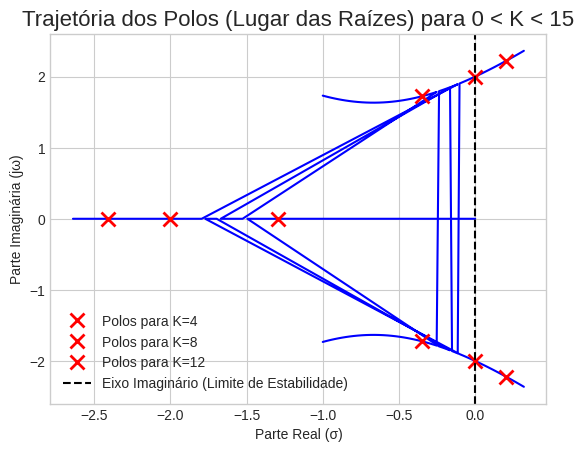


ANÁLISE:
O gráfico mostra claramente o caminho dos três polos do sistema à medida que K aumenta.
- Para K=0, os polos estão em malha aberta (-2, 0, 0).
- Conforme K aumenta, os polos complexos se movem em direção ao eixo imaginário.
- Exatamente em K=8, os polos cruzam o eixo imaginário, confirmando o início da instabilidade.
- Para K > 8, os polos complexos estão no semiplano direito, caracterizando o sistema instável.


In [3]:
print("\n--- Simulação 2: Visualizando a Migração dos Polos ---")

# A mesma equação característica: s³ + 2s² + 4s + K = 0

# Varreremos uma faixa de valores de K para ver como os polos se movem
K_range = np.linspace(0, 15, 100)
all_poles = []

for K in K_range:
    den = [1, 2, 4, K]
    poles = np.roots(den)
    all_poles.append(poles)

# Organiza os polos para o plot
poles_array = np.array(all_poles)

plt.figure()
# Plota a trajetória de cada um dos 3 polos
for i in range(poles_array.shape[1]):
    plt.plot(np.real(poles_array[:, i]), np.imag(poles_array[:, i]), 'b-')

# Adiciona marcadores para os valores de K testados na simulação anterior
for K in ganhos.values():
    poles = np.roots([1, 2, 4, K])
    plt.plot(np.real(poles), np.imag(poles), 'rx', markersize=10, markeredgewidth=2, label=f'Polos para K={K}')

plt.title('Trajetória dos Polos (Lugar das Raízes) para 0 < K < 15', fontsize=16)
plt.xlabel('Parte Real (σ)')
plt.ylabel('Parte Imaginária (jω)')
plt.axvline(0, color='k', linestyle='--', label='Eixo Imaginário (Limite de Estabilidade)')
plt.grid(True)
plt.legend()
plt.show()

print("\nANÁLISE:")
print("O gráfico mostra claramente o caminho dos três polos do sistema à medida que K aumenta.")
print("- Para K=0, os polos estão em malha aberta (-2, 0, 0).")
print("- Conforme K aumenta, os polos complexos se movem em direção ao eixo imaginário.")
print(f"- Exatamente em K={K_marginal}, os polos cruzam o eixo imaginário, confirmando o início da instabilidade.")
print("- Para K > 8, os polos complexos estão no semiplano direito, caracterizando o sistema instável.")